<a href="https://colab.research.google.com/github/arsalanyaghoobi/Text-Generation-and-Prediction-RNN-CNN-/blob/master/Text_Generation_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O my Luve is like a red, red rose
   That’s newly sprung in June;
O my Luve is like the melody
   That’s sweetly played in tune.

So fair art thou, my bonnie lass,
   So deep in luve am I;
And I will luve thee still, my dear,
   Till a’ the seas gang dry.

Till a’ the seas gang dry, my dear,
   And the rocks melt wi’ the sun;
I will love thee still, my dear,
   While the sands o’ life shall run.

And fare thee weel, my only luve!
   And fare thee weel awhile!
And I will come again, my luve,
   Though it were ten thousand mile.

In [ ]:
import tensorflow as tf 
import numpy as np 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer()

In [ ]:
data="O my Luve is like a red, red rose \n That’s newly sprung in June;\n O my Luve is like the melody \n That’s sweetly played in tune. \n So fair art thou, my bonnie lass,\n So deep in luve am I;\n And I will luve thee still, my dear,\n Till a’ the seas gang dry.\n Till a’ the seas gang dry, my dear,\n And the rocks melt wi’ the sun;\n I will love thee still, my dear,\n While the sands o’ life shall run.\n And fare thee weel, my only luve!\n And fare thee weel awhile!\n And I will come again, my luve,\n Though it were ten thousand mil"
corpus=data.lower().split("\n")

In [ ]:
tokenizer.fit_on_texts(corpus)
word_index=tokenizer.word_index
print(word_index)

{'my': 1, 'luve': 2, 'the': 3, 'and': 4, 'i': 5, 'thee': 6, 'in': 7, 'will': 8, 'dear': 9, 'o': 10, 'is': 11, 'like': 12, 'red': 13, 'that’s': 14, 'so': 15, 'still': 16, 'till': 17, 'a’': 18, 'seas': 19, 'gang': 20, 'dry': 21, 'fare': 22, 'weel': 23, 'a': 24, 'rose': 25, 'newly': 26, 'sprung': 27, 'june': 28, 'melody': 29, 'sweetly': 30, 'played': 31, 'tune': 32, 'fair': 33, 'art': 34, 'thou': 35, 'bonnie': 36, 'lass': 37, 'deep': 38, 'am': 39, 'rocks': 40, 'melt': 41, 'wi’': 42, 'sun': 43, 'love': 44, 'while': 45, 'sands': 46, 'o’': 47, 'life': 48, 'shall': 49, 'run': 50, 'only': 51, 'awhile': 52, 'come': 53, 'again': 54, 'though': 55, 'it': 56, 'were': 57, 'ten': 58, 'thousand': 59, 'mil': 60}


In [ ]:
total_num=len(tokenizer.word_index)+1
print(total_num)

61


In [ ]:
input_sequences=[]
for line in corpus:
  token_list=tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(token_list)):
    n_gram_sequences=token_list[:i+1]
    input_sequences.append(n_gram_sequences)
    print(n_gram_sequences)

[10, 1]
[10, 1, 2]
[10, 1, 2, 11]
[10, 1, 2, 11, 12]
[10, 1, 2, 11, 12, 24]
[10, 1, 2, 11, 12, 24, 13]
[10, 1, 2, 11, 12, 24, 13, 13]
[10, 1, 2, 11, 12, 24, 13, 13, 25]
[14, 26]
[14, 26, 27]
[14, 26, 27, 7]
[14, 26, 27, 7, 28]
[10, 1]
[10, 1, 2]
[10, 1, 2, 11]
[10, 1, 2, 11, 12]
[10, 1, 2, 11, 12, 3]
[10, 1, 2, 11, 12, 3, 29]
[14, 30]
[14, 30, 31]
[14, 30, 31, 7]
[14, 30, 31, 7, 32]
[15, 33]
[15, 33, 34]
[15, 33, 34, 35]
[15, 33, 34, 35, 1]
[15, 33, 34, 35, 1, 36]
[15, 33, 34, 35, 1, 36, 37]
[15, 38]
[15, 38, 7]
[15, 38, 7, 2]
[15, 38, 7, 2, 39]
[15, 38, 7, 2, 39, 5]
[4, 5]
[4, 5, 8]
[4, 5, 8, 2]
[4, 5, 8, 2, 6]
[4, 5, 8, 2, 6, 16]
[4, 5, 8, 2, 6, 16, 1]
[4, 5, 8, 2, 6, 16, 1, 9]
[17, 18]
[17, 18, 3]
[17, 18, 3, 19]
[17, 18, 3, 19, 20]
[17, 18, 3, 19, 20, 21]
[17, 18]
[17, 18, 3]
[17, 18, 3, 19]
[17, 18, 3, 19, 20]
[17, 18, 3, 19, 20, 21]
[17, 18, 3, 19, 20, 21, 1]
[17, 18, 3, 19, 20, 21, 1, 9]
[4, 3]
[4, 3, 40]
[4, 3, 40, 41]
[4, 3, 40, 41, 42]
[4, 3, 40, 41, 42, 3]
[4, 3, 40, 41, 42,

In [ ]:
max_sequence_len=max([len(x) for x in input_sequences])
print(max_sequence_len)

9


In [ ]:
pad_input_sequences=pad_sequences(input_sequences,maxlen=max_sequence_len,padding='pre')
print(pad_input_sequences)

[[ 0  0  0  0  0  0  0 10  1]
 [ 0  0  0  0  0  0 10  1  2]
 [ 0  0  0  0  0 10  1  2 11]
 [ 0  0  0  0 10  1  2 11 12]
 [ 0  0  0 10  1  2 11 12 24]
 [ 0  0 10  1  2 11 12 24 13]
 [ 0 10  1  2 11 12 24 13 13]
 [10  1  2 11 12 24 13 13 25]
 [ 0  0  0  0  0  0  0 14 26]
 [ 0  0  0  0  0  0 14 26 27]
 [ 0  0  0  0  0 14 26 27  7]
 [ 0  0  0  0 14 26 27  7 28]
 [ 0  0  0  0  0  0  0 10  1]
 [ 0  0  0  0  0  0 10  1  2]
 [ 0  0  0  0  0 10  1  2 11]
 [ 0  0  0  0 10  1  2 11 12]
 [ 0  0  0 10  1  2 11 12  3]
 [ 0  0 10  1  2 11 12  3 29]
 [ 0  0  0  0  0  0  0 14 30]
 [ 0  0  0  0  0  0 14 30 31]
 [ 0  0  0  0  0 14 30 31  7]
 [ 0  0  0  0 14 30 31  7 32]
 [ 0  0  0  0  0  0  0 15 33]
 [ 0  0  0  0  0  0 15 33 34]
 [ 0  0  0  0  0 15 33 34 35]
 [ 0  0  0  0 15 33 34 35  1]
 [ 0  0  0 15 33 34 35  1 36]
 [ 0  0 15 33 34 35  1 36 37]
 [ 0  0  0  0  0  0  0 15 38]
 [ 0  0  0  0  0  0 15 38  7]
 [ 0  0  0  0  0 15 38  7  2]
 [ 0  0  0  0 15 38  7  2 39]
 [ 0  0  0 15 38  7  2 39  5]
 [ 0  0  0

In [ ]:
pad_input_sequences_array=np.array(pad_input_sequences)
print(pad_input_sequences_array)

[[ 0  0  0  0  0  0  0 10  1]
 [ 0  0  0  0  0  0 10  1  2]
 [ 0  0  0  0  0 10  1  2 11]
 [ 0  0  0  0 10  1  2 11 12]
 [ 0  0  0 10  1  2 11 12 24]
 [ 0  0 10  1  2 11 12 24 13]
 [ 0 10  1  2 11 12 24 13 13]
 [10  1  2 11 12 24 13 13 25]
 [ 0  0  0  0  0  0  0 14 26]
 [ 0  0  0  0  0  0 14 26 27]
 [ 0  0  0  0  0 14 26 27  7]
 [ 0  0  0  0 14 26 27  7 28]
 [ 0  0  0  0  0  0  0 10  1]
 [ 0  0  0  0  0  0 10  1  2]
 [ 0  0  0  0  0 10  1  2 11]
 [ 0  0  0  0 10  1  2 11 12]
 [ 0  0  0 10  1  2 11 12  3]
 [ 0  0 10  1  2 11 12  3 29]
 [ 0  0  0  0  0  0  0 14 30]
 [ 0  0  0  0  0  0 14 30 31]
 [ 0  0  0  0  0 14 30 31  7]
 [ 0  0  0  0 14 30 31  7 32]
 [ 0  0  0  0  0  0  0 15 33]
 [ 0  0  0  0  0  0 15 33 34]
 [ 0  0  0  0  0 15 33 34 35]
 [ 0  0  0  0 15 33 34 35  1]
 [ 0  0  0 15 33 34 35  1 36]
 [ 0  0 15 33 34 35  1 36 37]
 [ 0  0  0  0  0  0  0 15 38]
 [ 0  0  0  0  0  0 15 38  7]
 [ 0  0  0  0  0 15 38  7  2]
 [ 0  0  0  0 15 38  7  2 39]
 [ 0  0  0 15 38  7  2 39  5]
 [ 0  0  0

In [ ]:
xs=pad_input_sequences[:,:-1]
labels=pad_input_sequences[:,-1]
ys=tf.keras.utils.to_categorical(labels,num_classes=total_num)
print(xs)


[[ 0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0 10  1]
 [ 0  0  0  0  0 10  1  2]
 [ 0  0  0  0 10  1  2 11]
 [ 0  0  0 10  1  2 11 12]
 [ 0  0 10  1  2 11 12 24]
 [ 0 10  1  2 11 12 24 13]
 [10  1  2 11 12 24 13 13]
 [ 0  0  0  0  0  0  0 14]
 [ 0  0  0  0  0  0 14 26]
 [ 0  0  0  0  0 14 26 27]
 [ 0  0  0  0 14 26 27  7]
 [ 0  0  0  0  0  0  0 10]
 [ 0  0  0  0  0  0 10  1]
 [ 0  0  0  0  0 10  1  2]
 [ 0  0  0  0 10  1  2 11]
 [ 0  0  0 10  1  2 11 12]
 [ 0  0 10  1  2 11 12  3]
 [ 0  0  0  0  0  0  0 14]
 [ 0  0  0  0  0  0 14 30]
 [ 0  0  0  0  0 14 30 31]
 [ 0  0  0  0 14 30 31  7]
 [ 0  0  0  0  0  0  0 15]
 [ 0  0  0  0  0  0 15 33]
 [ 0  0  0  0  0 15 33 34]
 [ 0  0  0  0 15 33 34 35]
 [ 0  0  0 15 33 34 35  1]
 [ 0  0 15 33 34 35  1 36]
 [ 0  0  0  0  0  0  0 15]
 [ 0  0  0  0  0  0 15 38]
 [ 0  0  0  0  0 15 38  7]
 [ 0  0  0  0 15 38  7  2]
 [ 0  0  0 15 38  7  2 39]
 [ 0  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  4  5]
 [ 0  0  0  0  0  4  5  8]
 [ 0  0  0  0  4  5  8  2]
 

In [ ]:
print(labels)

[ 1  2 11 12 24 13 13 25 26 27  7 28  1  2 11 12  3 29 30 31  7 32 33 34
 35  1 36 37 38  7  2 39  5  5  8  2  6 16  1  9 18  3 19 20 21 18  3 19
 20 21  1  9  3 40 41 42  3 43  8 44  6 16  1  9  3 46 47 48 49 50 22  6
 23  1 51  2 22  6 23 52  5  8 53 54  1  2 56 57 58 59 60]


In [ ]:
print(ys)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
model=tf.keras.Sequential([
                     tf.keras.layers.Embedding(total_num,64,input_length=max_sequence_len-1),
                     tf.keras.layers.Conv1D(64,5,activation='relu'),
                     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
                     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10)),
                     tf.keras.layers.Dense(100,activation='relu'),
                     tf.keras.layers.Dense(61,activation='softmax')
                     ])


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 64)             3904      
_________________________________________________________________
conv1d (Conv1D)              (None, 4, 64)             20544     
_________________________________________________________________
bidirectional (Bidirectional (None, 4, 40)             13600     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 20)                4080      
_________________________________________________________________
dense (Dense)                (None, 100)               2100      
_________________________________________________________________
dense_1 (Dense)              (None, 61)                6161      
Total params: 50,389
Trainable params: 50,389
Non-trainable params: 0
____________________________________________________

In [ ]:
history=model.fit(xs,
                  ys,
                  epochs=1000,
                  verbose=1)

Epoch 1/1000
3/3 [==============================] - 0s 10ms/step - loss: 4.1105 - accuracy: 0.0659
Epoch 2/1000
3/3 [==============================] - 0s 9ms/step - loss: 4.1057 - accuracy: 0.0440
Epoch 3/1000
3/3 [==============================] - 0s 9ms/step - loss: 4.1002 - accuracy: 0.0769
Epoch 4/1000
3/3 [==============================] - 0s 8ms/step - loss: 4.0941 - accuracy: 0.0769
Epoch 5/1000
3/3 [==============================] - 0s 8ms/step - loss: 4.0853 - accuracy: 0.0769
Epoch 6/1000
3/3 [==============================] - 0s 9ms/step - loss: 4.0724 - accuracy: 0.0769
Epoch 7/1000
3/3 [==============================] - 0s 8ms/step - loss: 4.0519 - accuracy: 0.0769
Epoch 8/1000
3/3 [==============================] - 0s 8ms/step - loss: 4.0247 - accuracy: 0.0769
Epoch 9/1000
3/3 [==============================] - 0s 8ms/step - loss: 3.9775 - accuracy: 0.0659
Epoch 10/1000
3/3 [==============================] - 0s 10ms/step - loss: 3.9155 - accuracy: 0.0659
Epoch 11/1000
3/3

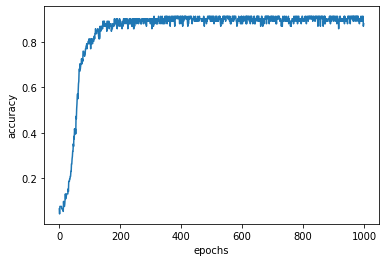

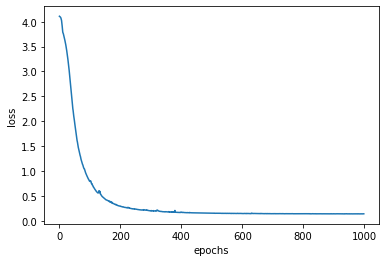

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.show()
plot_graphs(history,"accuracy")
plot_graphs(history,"loss")

In [ ]:
seed_text="I will "
next_words=2

In [ ]:
for _ in range(next_words):
  token_list=tokenizer.texts_to_sequences([seed_text])[0]
  token_list=pad_sequences([token_list],maxlen=max_sequence_len-1,padding='pre')
  predicted=model.predict_classes(token_list,verbose=0)
  output_word=""
  for word, index in tokenizer.word_index.items():
    if index==predicted:
      output_word=word
      break
  seed_text += ""  +  output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I will lovethee
